In [1]:
# Import lib
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_val, y_val = X_train[50000:, :], y_train[50000:]
X_train, y_train = X_train[:50000, :], y_train[:50000]
X_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(50000, 28, 28)

Input data cho mô hình CNN là 1 tensor 4 chiều (N, W, H, D) lần lượt là số lượng ảnh cần trainning, chiều rộng, dài, và số chanel của mỗi bức ảnh. Do Input data ban đầu là (50000, 28, 28) nên cần reshape lại thành (50000, 28, 28, 1)

In [3]:
# Reshape input 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)

Chuyển output label thành các vector one-hot encoding label.

In [5]:
# One-hot encoding label(Y)
Y_train = np_utils.to_categorical(y_train, 10)
Y_val = np_utils.to_categorical(y_val, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print('Label y: ', y_train[0])
print('Label y after one-hot encoding: ', Y_train[0])

Label y:  5
Label y after one-hot encoding:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Các bước định nghĩa một models:


1.   Models = Sequential() => Các layers của model được xếp chồng lên nhau theo kiểu stack.
2.   Ở layer đầu tiên cần chỉ rõ input_shape của ảnh, input_shape = (W, H, D).
3.   Khi thêm các Convolutional Layer cần xác định rõ các tham số K(Số lượng layer), Kernel_size(W, H), hàm Activation sử dụng.
4.   Khi thêm các MaxPooling Layer cần chỉ rõ size của kernel.
5.   Khi flatten từ tensor sang vector chỉ cần thêm flatten layer.
6.   Khi thêm Fully Connected Layer (FC) cần chỉ rõ số lượng node trong layer và hàm activation được sử dụng trong layer.



In [7]:
from keras.layers.pooling import MaxPooling2D
# Define a model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [8]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:
# Train model with data
Model = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.2970 - accuracy: 0.9192 - val_loss: 0.0702 - val_accuracy: 0.9817
Epoch 2/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.0554 - accuracy: 0.9842 - val_loss: 0.0497 - val_accuracy: 0.9857
Epoch 3/10
1563/1563 [==============================] - 90s 57ms/step - loss: 0.0347 - accuracy: 0.9901 - val_loss: 0.0434 - val_accuracy: 0.9867
Epoch 4/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.0242 - accuracy: 0.9928 - val_loss: 0.0432 - val_accuracy: 0.9870
Epoch 5/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.0156 - accuracy: 0.9954 - val_loss: 0.0405 - val_accuracy: 0.9880
Epoch 6/10
1563/1563 [==============================] - 89s 57ms/step - loss: 0.0113 - accuracy: 0.9970 - val_loss: 0.0399 - val_accuracy: 0.9887
Epoch 7/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.0075 - accuracy: 0.9981 - val_loss: 0.0457 -

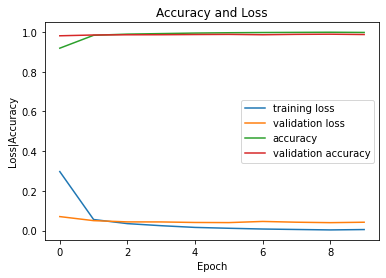

In [12]:
# Vẽ đồ thị hàm loss 
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), Model.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), Model.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), Model.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), Model.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [13]:
# Đánh giá model với test data
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.04333067312836647, 0.9872999787330627]
